### Schools information retrieval

*Author: Liubov, Lecturers without borders*

Retrieve information about places around the point given location.
Input: Coordinates, Openstreetmap. Output: list of schools, suggested to a person. 
Packages used:

https://help.openstreetmap.org/questions/11004/download-a-map-and-extract-position-from-places-like-schools-hospitals-etc

Algorithm for objects identification from a map:
1. give coordinate (lat, lon)
2. send api call to openstreetmap 
3. get information about places around 

Alternatively if we need all the school data (~1 million of uses around the world), downloading planet file in PBF, which is only ~40 GB, and then we can filter them. 


### Openstreetmap API 

Openstreetmap (OSM) data types. There are 3 main data types: 
1. nodes (data points), 
2. ways (collection of points), the way on the other hand is a ordered list of nodes, which could correspond to a street or the outline of a house. 
3. relations.
There are also different types of amenities 
amenity "bar", or "highway" as we write below.
Example of parsing data is given in the blog https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0


loading graph of Moscow


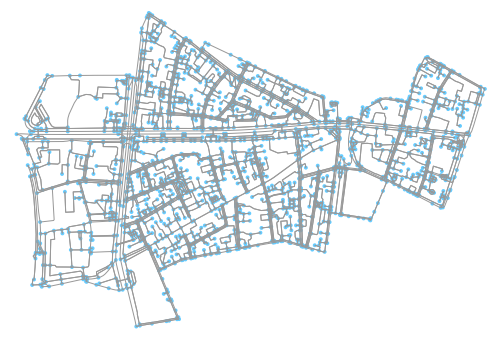

loading places


Index(['access', 'addr:city', 'addr:housenumber', 'addr:street', 'amenity',
       'barrier', 'bicycle', 'contact:email', 'contact:phone',
       'contact:website', 'education', 'education_form:fulltime',
       'education_form:parttime', 'education_level:primary',
       'education_level:secondary', 'education_profile:general',
       'education_profile:languages', 'education_profile:music',
       'education_programme:EN', 'education_system:ru_standard',
       'element_type', 'entrance', 'foot', 'geometry', 'historic', 'memorial',
       'name', 'name:en', 'official_name', 'opening_hours', 'osmid',
       'ownership', 'short_name', 'start_date', 'wheelchair', 'wikidata',
       'wikipedia', 'building', 'building:colour', 'building:levels',
       'fence_type', 'name:de', 'nodes', 'old_name', 'roof:material',
       'roof:shape', 'training', 'wikipedia:ru', 'addr:street2',
       'contact:facebook', 'type', 'ways'],
      dtype='object')

In [11]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3
# https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html


# Specify the name that is used to seach for the data
place_name = "Arbat, Moscow, Russia"# Kremlin, Arbat "Kamppi, Helsinki, Finland"


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

print('loading graph of Moscow')

# Plot the streets
fig, ax = ox.plot_graph(graph)


# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)
print('loading places')

# Retrieve buildings from the area
#buildings = ox.footprints(place_name) #buildings_from_place(place_name)

# What types are those? if there is any information about buildings_from_place
#print(type(area))
#print(type(buildings))

# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

schools = ox.pois_from_place(place_name, amenities=['school'])


# How many schools do we have in this district?
len(schools)

# Available columns and names of amenity we are searching for
schools.columns

### Retrieve information about places 
Given certain coordinate we want now to get the information about places around certain coordinate. 

In [6]:
import overpy
# example code to test overpy


api = overpy.Overpass()

# fetch all ways and nodes
result = api.query("""
    way(50.746,7.154,50.748,7.157) ["highway"];
    (._;>;);
    out body;
    """)


for way in result.ways:
    print("Name: %s" % way.tags.get("name", "n/a"))
    print("  Highway: %s" % way.tags.get("highway", "n/a"))
    print("  Nodes:")
    for node in way.nodes:
        print("    Lat: %f, Lon: %f" % (node.lat, node.lon))
        

result_school = api.query("""
    way(50.746,7.154,55.748,70.157) ["school"];
    (._;>;);
    out body;
    """)

for way in result_school.ways:
    print("Name: %s" % way.tags.get("name", "n/a"))
    print("  School: %s" % way.tags.get("school", "n/a"))
    print("  Nodes:")
        

Name: Rhedenstraße
  Highway: residential
  Nodes:
    Lat: 50.746874, Lon: 7.156307
    Lat: 50.746598, Lon: 7.156237
    Lat: 50.746477, Lon: 7.156199
    Lat: 50.746360, Lon: 7.156124
    Lat: 50.746263, Lon: 7.156023
    Lat: 50.746194, Lon: 7.155926
    Lat: 50.746139, Lon: 7.155843
Name: Von-Ketteler-Straße
  Highway: residential
  Nodes:
    Lat: 50.746905, Lon: 7.155786
    Lat: 50.747222, Lon: 7.155621
Name: Mutter-Barat-Straße
  Highway: residential
  Nodes:
    Lat: 50.747989, Lon: 7.156302
    Lat: 50.747934, Lon: 7.156229
    Lat: 50.747695, Lon: 7.155421
    Lat: 50.747605, Lon: 7.155159
    Lat: 50.747241, Lon: 7.154310
    Lat: 50.746939, Lon: 7.153634
Name: Stegerwaldstraße
  Highway: residential
  Nodes:
    Lat: 50.747853, Lon: 7.153685
    Lat: 50.747666, Lon: 7.154022
    Lat: 50.747673, Lon: 7.154122
    Lat: 50.747939, Lon: 7.154603
    Lat: 50.748182, Lon: 7.155178
    Lat: 50.748318, Lon: 7.155590
    Lat: 50.748362, Lon: 7.155646
Name: Alte Schulstraße
  Highw

### Make calls for api for schools around lat lon in given radius 

API calls from OSM 
1.
https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_API_by_Example#Highway_around_schools_with_inappropriate_maxspeed_.28since_0.7.54.29 

2. https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0 

In [12]:
### Calls for API code given lat, lon 

lat = 10
lon = 100 

#// see: http://blattspinat.com/index.php/posts/tempo-50-vor-schulen
#[out:json][timeout:800];
#// Get all schools in current bounding box
#( way[amenity=school]({{bbox}});
#  node[amenity=school]({{bbox}});
#  rel[amenity=school]({{bbox}});
#)->.schools;




#load OSM data 

#node["amenity"=="cafe"]({{bbox}}); out;

